# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Modules and Libraries</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import calendar
import seaborn as sb
import numpy as np
from matplotlib import cm
c1=cm.get_cmap('Set1')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Reading Data</p>

In [2]:
data=pd.read_csv("/kaggle/input/retail-transactions-dataset/Retail_Transactions_Dataset.csv")

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Cleaning</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          20009 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


In [4]:
data.drop(['Transaction_ID','Customer_Name','Promotion'],axis=1,inplace=True)

In [5]:
data.duplicated().sum()

0

In [6]:
months=list(calendar.month_name)[1:]

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Getting Products</p>
</div>


In [7]:
sample1=[]
for i in data.Product:
  sample=i[1:-1].split(',')
  for j in sample:
    sample1.append(j.strip())
products=set(sample1)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Visualization</p>

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Customer Category</p>
</div>


Text(0.5, 1.0, 'Customer Category')

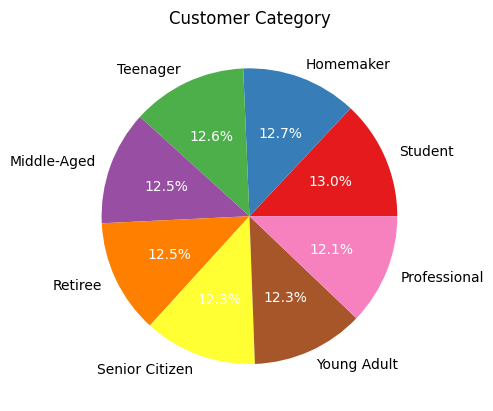

In [8]:
val=data["Customer_Category"].value_counts()
wedges,texts,autotexts=plt.pie(val,labels=val.index,autopct="%1.1f%%")
colors=[c1(i) for i in np.arange(0.1,0.9,0.1)]
for i in range(len(wedges)):
    wedges[i].set_facecolor(colors[i])
    autotexts[i].set_color('white')
plt.title('Customer Category')

In [9]:
newdfs=data[['Product','Season']].groupby('Season')

In [10]:
seasons=data.Season.unique()

In [11]:
def converter(input_element):
    return input_element.replace('[','').replace(']','').replace("'","")

In [12]:
dfs=[]
for i in seasons:
    dfs.append((i,newdfs.get_group(i)['Product'].apply(converter)))


In [13]:

def productcount(season,df):
    
    k={}
    for i in df:
        for j in i.split(','):
            j=j.strip()
            if j not in k:
                k[j]=1
            else:
                k[j]+=1
    return season,k 

answer=[]
for i in range(len(dfs)):
    answer.append(productcount(dfs[i][0],dfs[i][1]))

In [14]:
dataframe=[]
for i in range(len(answer)):
    df=pd.DataFrame(dict(products=answer[i][1].keys(),count=answer[i][1].values()))
    df.index.name=answer[i][0]
    dataframe.append(df)
    

In [15]:
winter=dataframe[0].sort_values(by='count',ascending=False).head(5)
Fall=dataframe[1].sort_values(by='count',ascending=False).head(5)
summer=dataframe[2].sort_values(by='count',ascending=False).head(5)
spring=dataframe[3].sort_values(by='count',ascending=False).head(5)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Top 5 Products in Each Season</p>
</div>


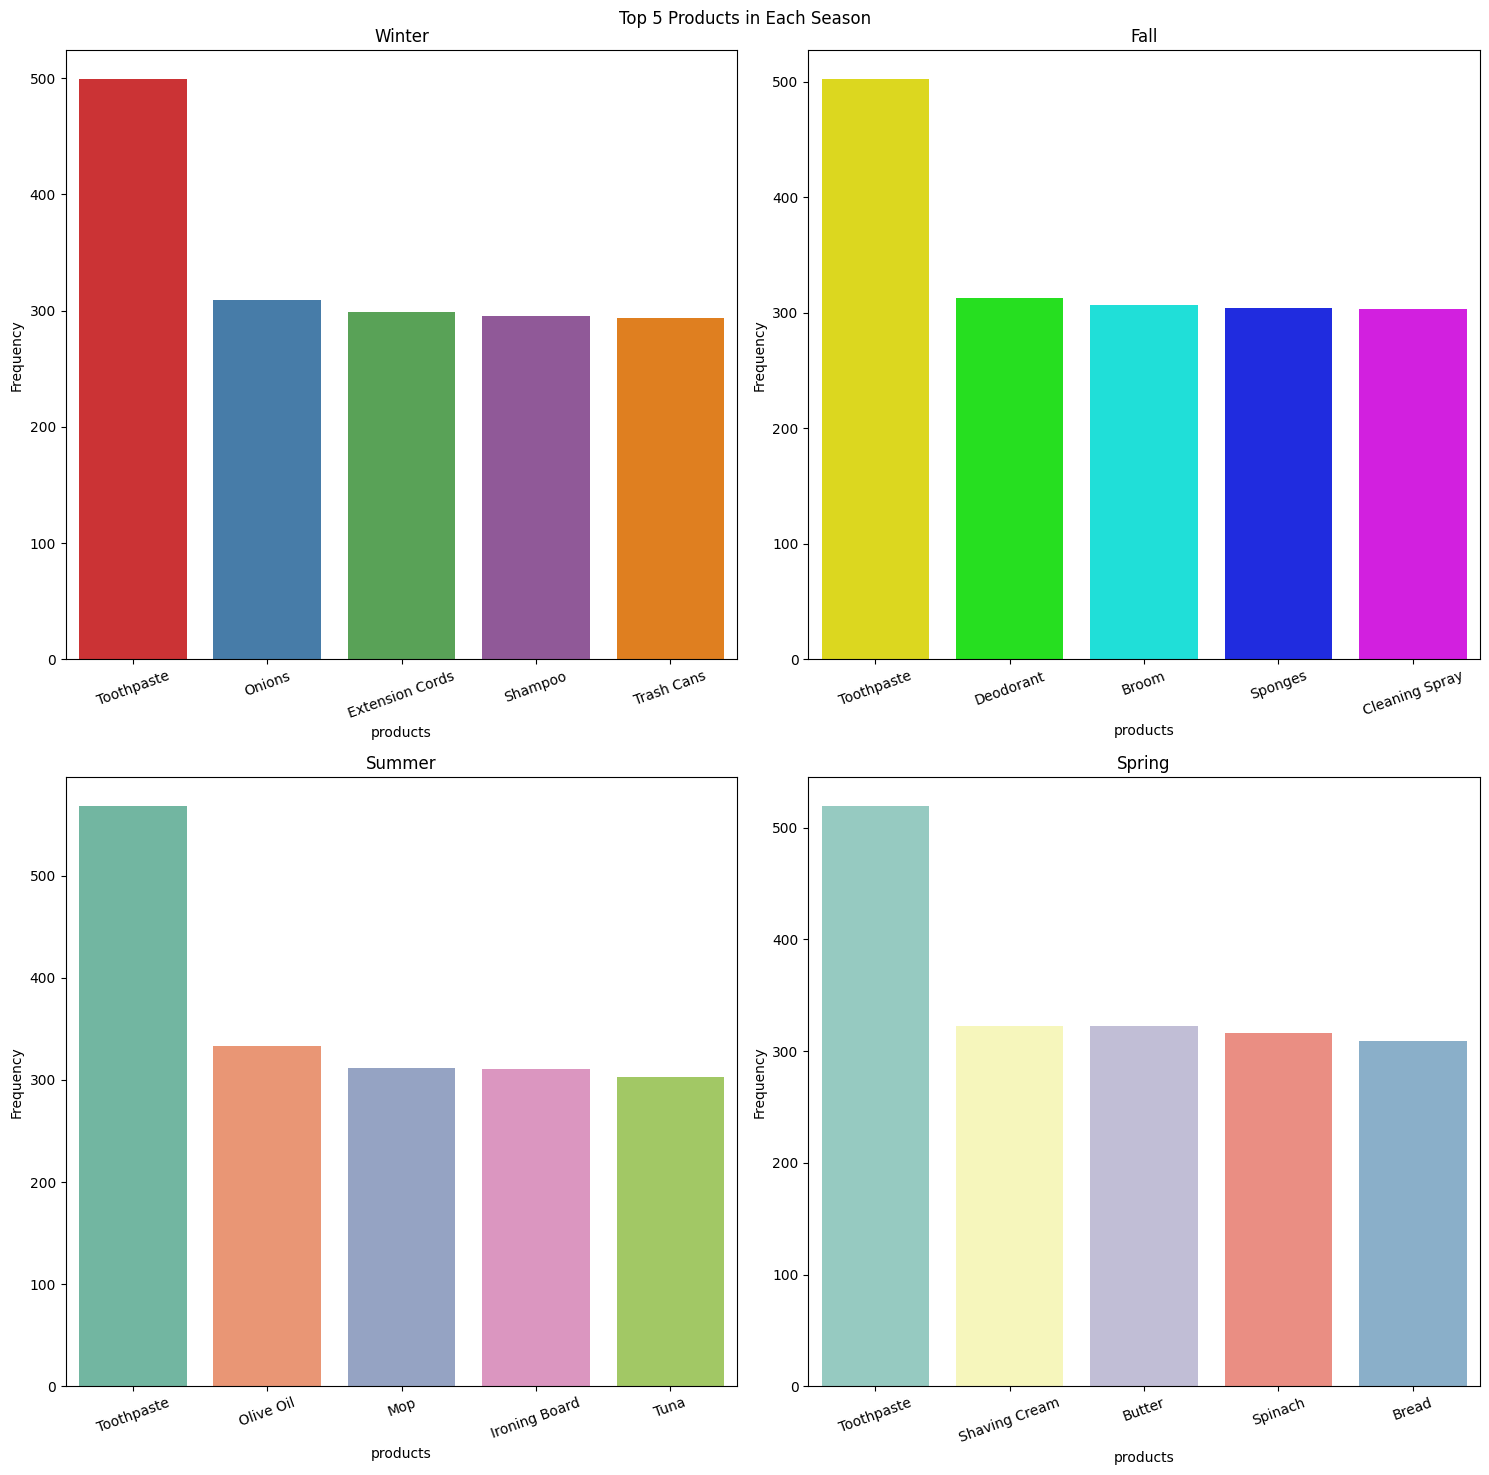

In [16]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

sb.barplot(x=winter.products,y=winter['count'],ax=axes[0][0],palette='Set1')
sb.barplot(x=Fall.products,y=Fall['count'],ax=axes[0][1],palette='hsv')
sb.barplot(x=summer.products,y=summer['count'],ax=axes[1][0],palette='Set2')
sb.barplot(x=spring.products,y=spring['count'],ax=axes[1][1],palette='Set3')
title=["Winter","Fall","Summer","Spring"]
count=0
for i in range(2):
  for j in range(2):
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation=20)
    axes[i][j].set_title(title[count])
    axes[i][j].set_ylabel('Frequency')
    count+=1
plt.suptitle('Top 5 Products in Each Season')
plt.tight_layout()

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Total Product Frequency</p>
</div>


Text(0.5, 1.0, 'Total Products Frequency')

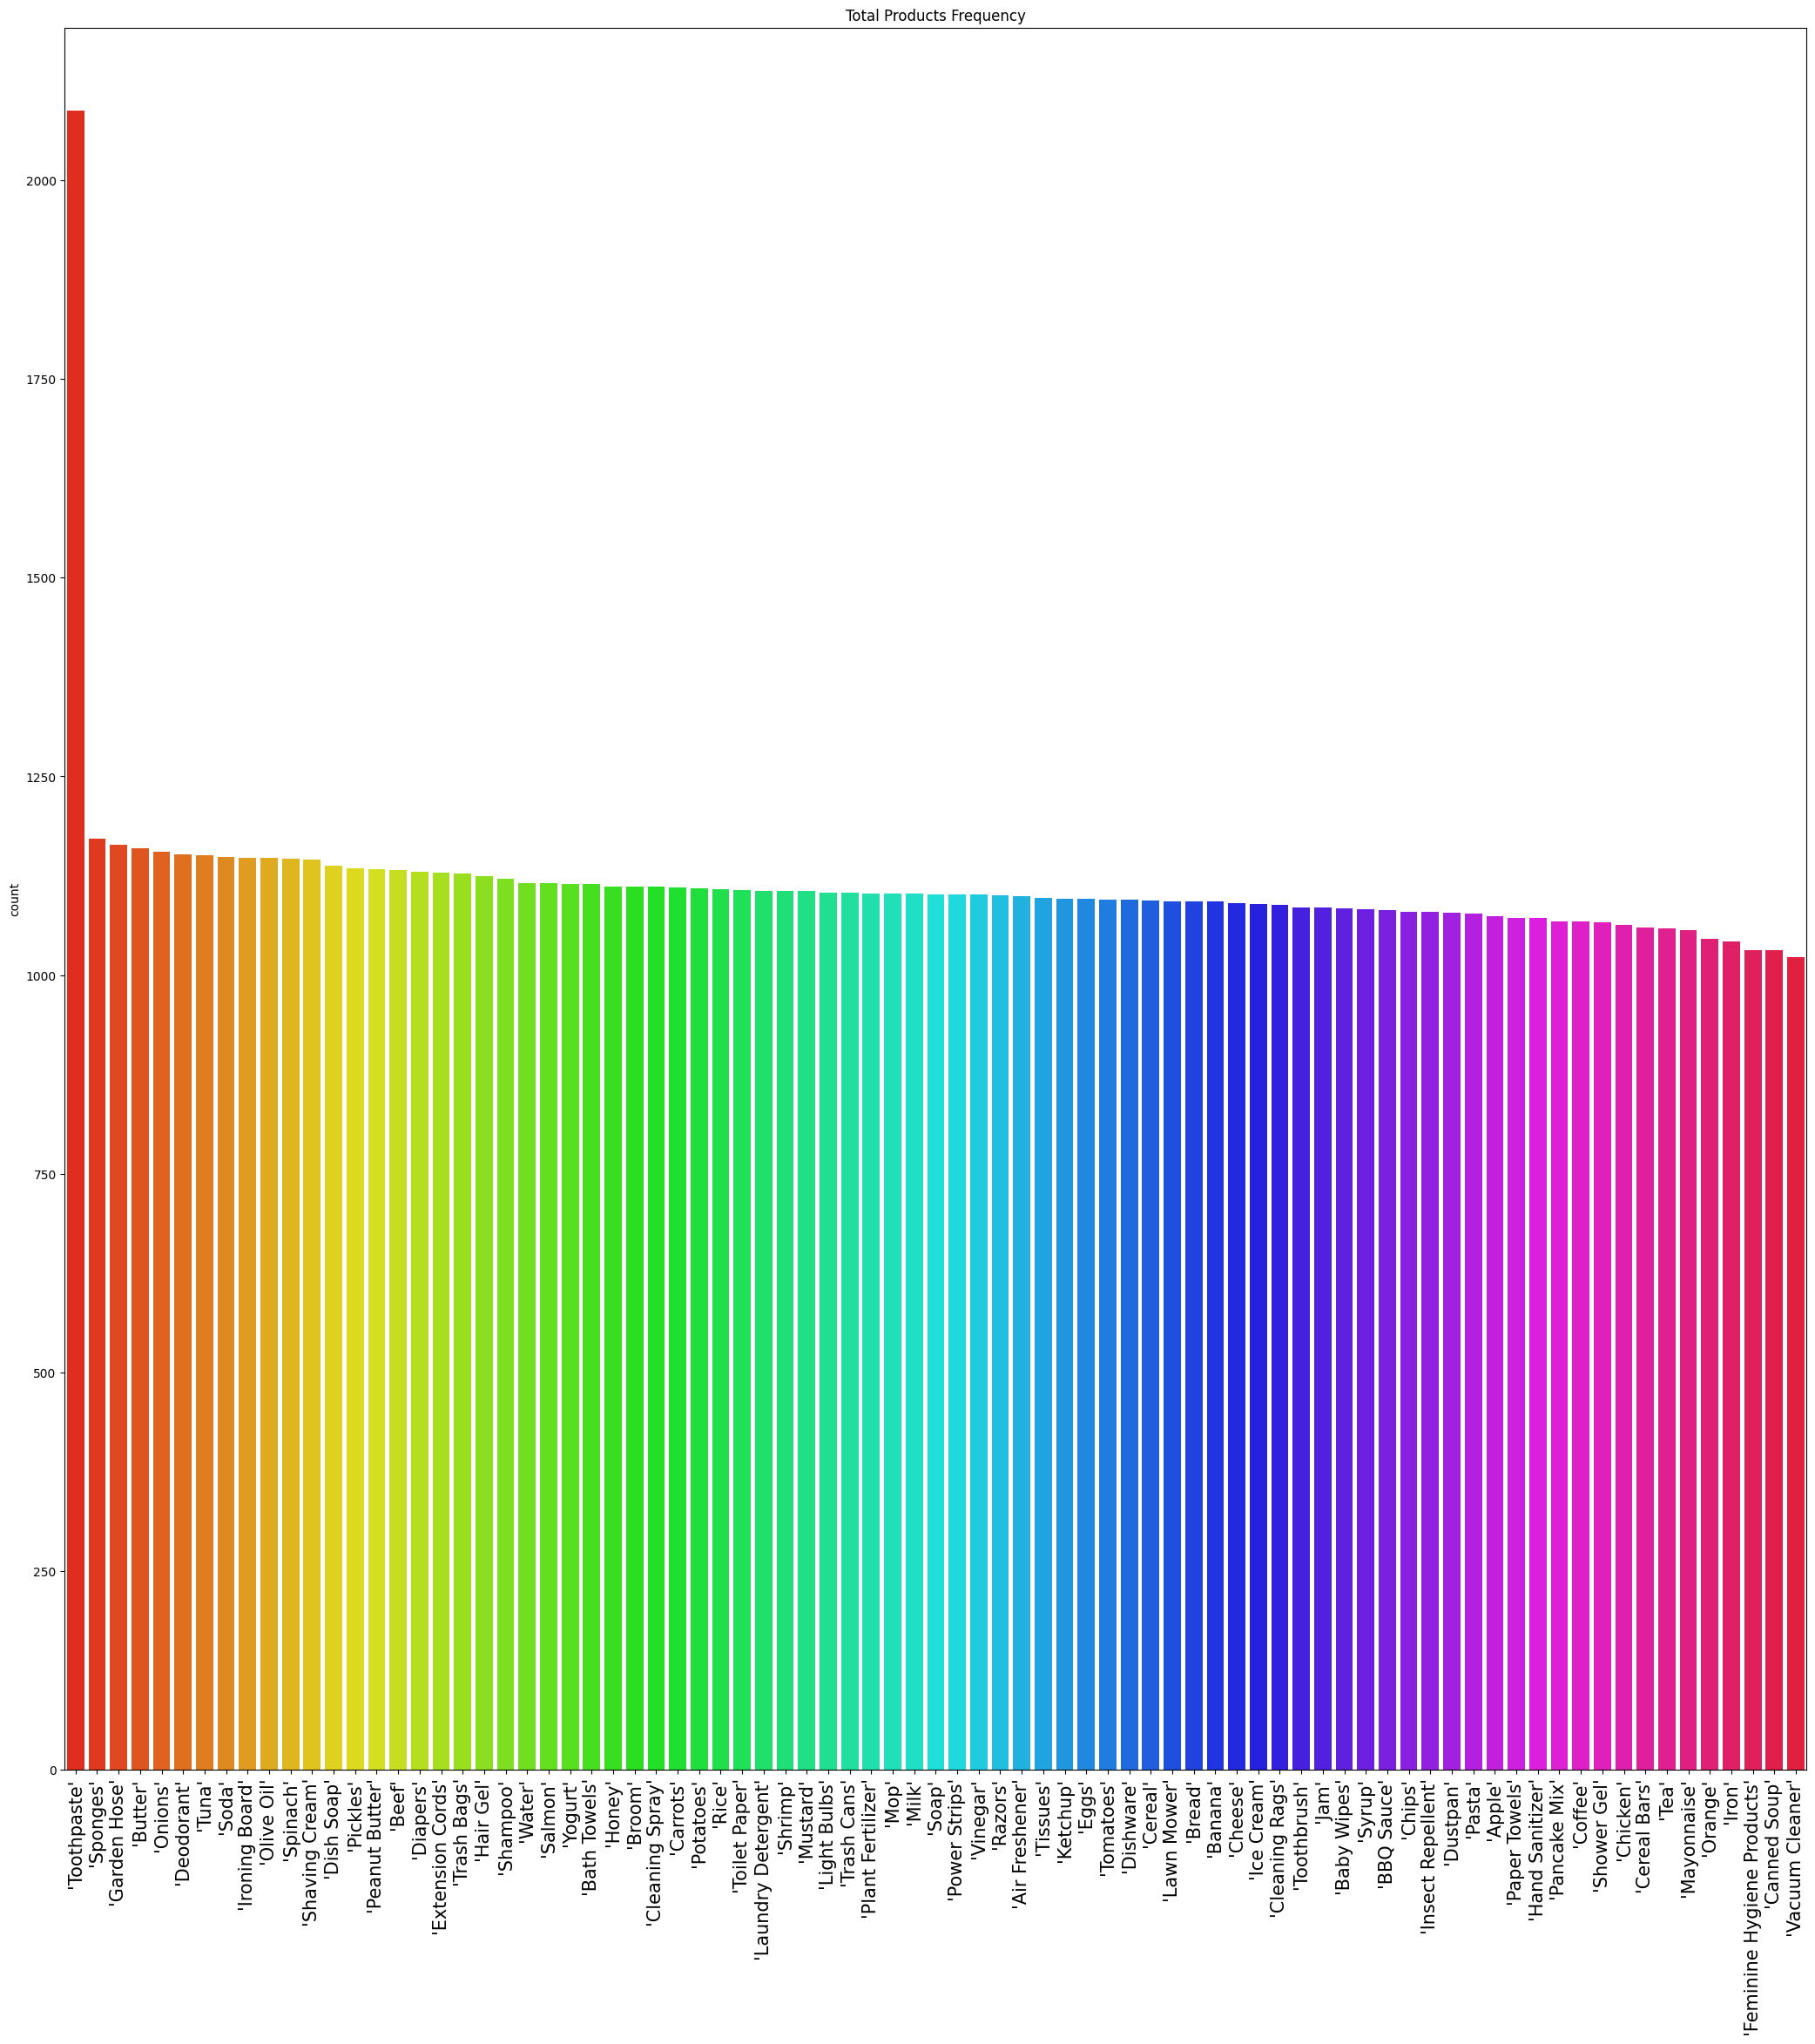

In [17]:
yval=pd.Series(sample1).value_counts()
xval=yval.index
fig=plt.figure(figsize=(20,20))
ax=fig.add_axes([1,1,1,1])
sb.barplot(x=xval,y=yval,ax=ax,palette='hsv')
plt.xticks(rotation=90,fontsize=15)
plt.title('Total Products Frequency')

In [18]:
data.Date=pd.to_datetime(data.Date)
year=[]
month=[]
for i in data.Date:
  year.append(i.strftime("%Y"))
  month.append(i.strftime("%m"))


In [19]:
data.drop("Date",axis=1,inplace=True)

In [20]:
data["year"]=year
data['month']=month
data['year']=data['year'].astype('int')
data.month=data['month'].astype('int')

year1=list(data.groupby("year"))[0][1]
year2=list(data.groupby("year"))[1][1]
year3=list(data.groupby("year"))[2][1]
year4=list(data.groupby("year"))[3][1]

In [21]:
year1cost=[]
year2cost=[]
year3cost=[]
year4cost=[]
for i in range(1,13):
  st='month == {}'.format(i)
  year1cost.append(year1.query(st).Total_Cost.sum())
  year2cost.append(year2.query(st).Total_Cost.sum())
  year3cost.append(year3.query(st).Total_Cost.sum())
  year4cost.append(year4.query(st).Total_Cost.sum())

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Total Sales in Each Year</p>
</div>


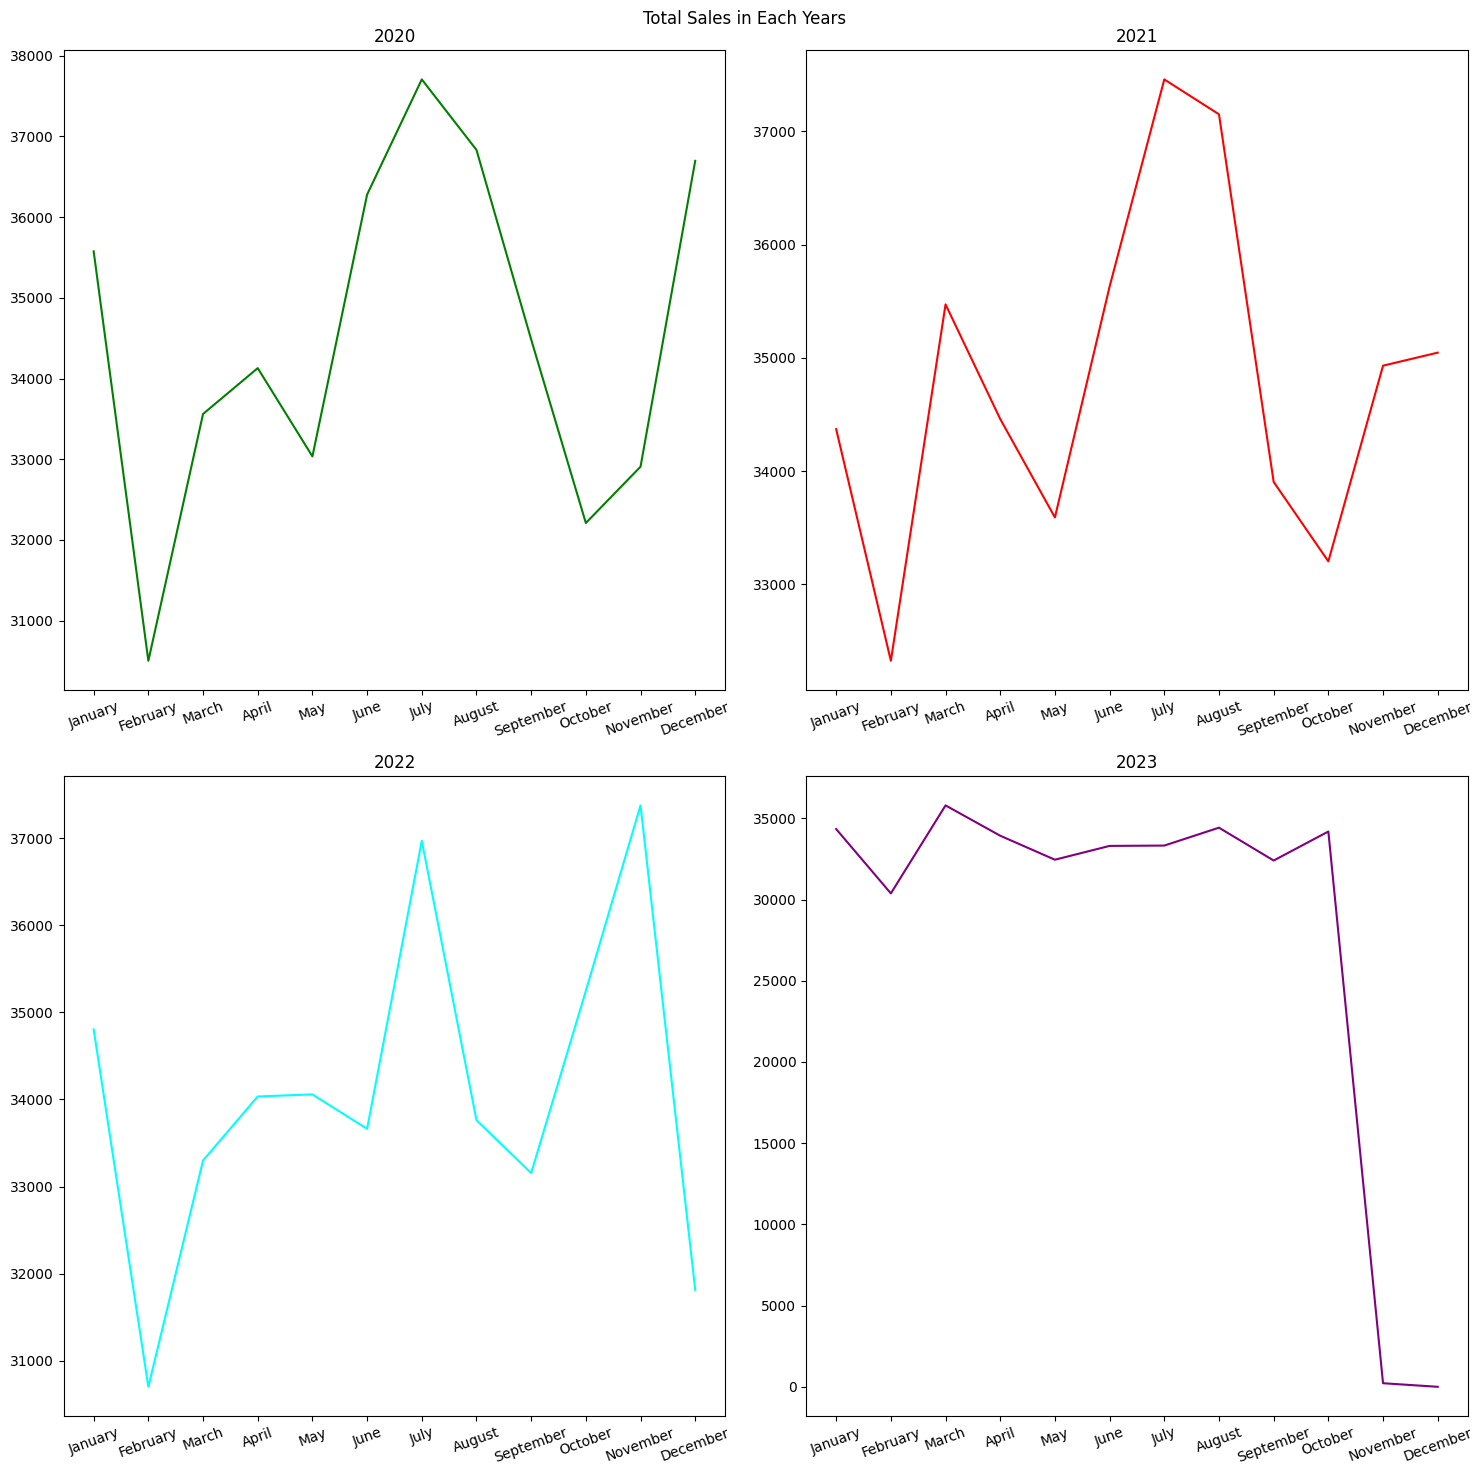

In [22]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

sb.lineplot(x=months,y=year1cost,ax=axes[0][0],color='green')
sb.lineplot(x=months,y=year2cost,ax=axes[0][1],color='red')
sb.lineplot(x=months,y=year3cost,ax=axes[1][0],color='cyan')
sb.lineplot(x=months,y=year4cost,ax=axes[1][1],color='purple')
title=["2020","2021","2022","2023"]
count=0
for i in range(2):
  for j in range(2):
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation=20)
    axes[i][j].set_title(title[count])
    count+=1
plt.suptitle('Total Sales in Each Years')
plt.tight_layout()

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">To be Continue.Thank u for visiting</p>
